In [27]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [28]:
filter?

In [30]:
# First find outliers for a normal distributed data, then remove them

arr = [10, 386, 479, 627, 20, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543]


def _check_outliers(data_arr):
    clean_list = list()
    removed_items = list()
    
    mean = np.mean(data)
    sd = np.std(data)
    
    for num in data_arr:
        if num > ((sd*3)-mean) or (num < ((sd*3)+mean)):
            clean_list.append(num)
        if ((num < ((sd*3)-mean) or (num > ((sd*3)+mean))):
            removed_items.append(num)
    
    return (clean_list, removed_items)

def remove_outliers(data):
    
#     final_list = filter(_check_outliers, data)

    return _check_outliers(data) # [list of outliers], [list of data without outliers]


print(remove_outliers(arr))

SyntaxError: invalid syntax (<ipython-input-30-6cafce9584ab>, line 16)

In [12]:
x = [st.norm.rvs(loc=5 , scale=1 , size=100), -5, 11, 14]

NameError: name 'scipy' is not defined

In [15]:


def find_remove_outlier_iqr(data_sample):
    # calculate interquartile range
    q25, q75 = np.percentile(data_sample, 25), np.percentile(data_sample, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in data_sample if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in data_sample if x > lower and x < upper]
    return outliers

y = np.array([-5, 11, 14])
x =  np.concatenate((st.norm.rvs(loc=5 , scale=1 , size=100), y))
print(type(x))
print(find_remove_outlier_iqr(x))
print(st.iqr(x))

<class 'numpy.ndarray'>
[-5.0, 11.0, 14.0]


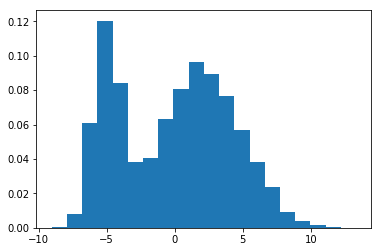

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

# Generate data samples and plot its histogram
x_1 = np.random.normal(-5, 1, 3000)
x_2 = np.random.normal(2, 3, 7000) 
x = np.concatenate((x_1, x_2))
plt.hist(x, bins=20, density=1)
plt.show()

In [20]:
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(x.reshape(-1,1))
print(gmm.means_)
print(gmm.covariances_)
print(gmm.weights_)

[[ 2.15453819]
 [-4.95990024]]
[[[8.1454462 ]]

 [[1.05885259]]]
[0.68455015 0.31544985]


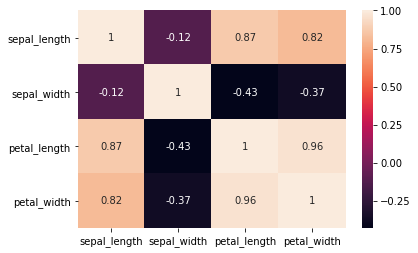

In [37]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import scipy.stats

iris = sns.load_dataset('iris')
iris.head()

df = iris
# df
df = df.drop(columns=['species'])
sns.heatmap(df.corr(), annot=True)